In [38]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [39]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path="C:/Users/91891/Downloads/hmnist_28_28_RGB.csv"

In [40]:
df=pd.read_csv(path)

In [41]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [42]:
from sklearn.model_selection import train_test_split
fractions = np.array([0.8, 0.2])
df = df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))
x_train = train_set.drop(columns=['label'])
y_train = train_set['label']

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
x_val = np.array(x_val, dtype=np.uint8).reshape(-1, 28, 28, 3)


In [43]:
print(len(train_set))

8012


In [44]:
print(len(test_set))

2003


In [45]:
df.label.unique()

array([4, 1, 2, 3, 6, 0, 5], dtype=int64)

In [46]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [47]:
#separating featues and labels
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])
columns=list(x_train)

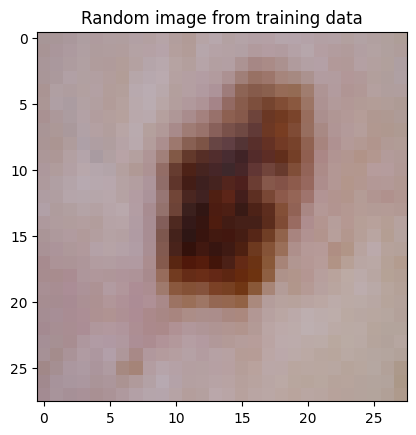

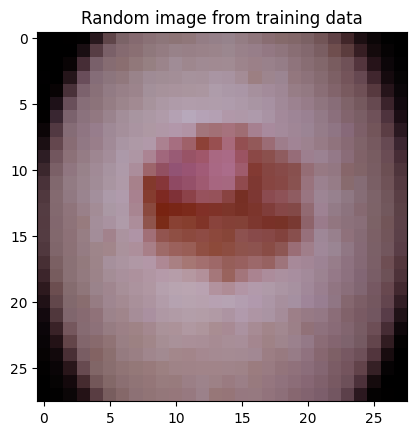

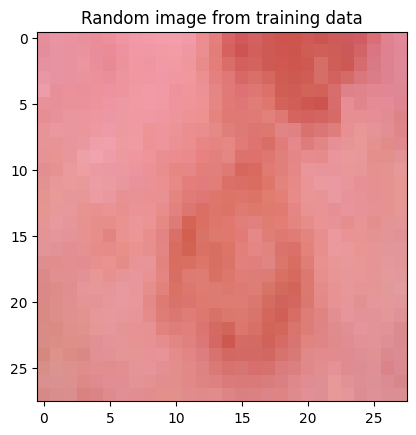

In [48]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [50]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
%time 

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_

In [51]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_accuracy', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

In [52]:
%time 
optimizer=tf.keras.optimizers.legacy.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])


CPU times: total: 0 ns
Wall time: 0 ns


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate the images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Randomly zoom images by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=True,     # Randomly flip images vertically
    fill_mode='nearest'     # How to fill in newly created pixels after a transformation
)

# Fit the ImageDataGenerator to the training data
datagen.fit(x_train)

# Create a batch generator using the augmented data
augmented_generator = datagen.flow(x_train, y_train, batch_size=128)

# Now you can use augmented_generator as the input data for model training
# Example:
model.fit(augmented_generator, steps_per_epoch=len(x_train) // 128, epochs=20)



Epoch 1/20
62/62 [==============================] - 8s 91ms/step - loss: 1.7965 - accuracy: 0.4205
Epoch 2/20
62/62 [==============================] - 9s 144ms/step - loss: 1.3438 - accuracy: 0.6092
Epoch 3/20
62/62 [==============================] - 10s 158ms/step - loss: 1.1319 - accuracy: 0.6634
Epoch 4/20
62/62 [==============================] - 10s 160ms/step - loss: 0.9889 - accuracy: 0.6871
Epoch 5/20
62/62 [==============================] - 9s 151ms/step - loss: 0.9064 - accuracy: 0.6832
Epoch 6/20
62/62 [==============================] - 9s 144ms/step - loss: 0.8585 - accuracy: 0.7007
Epoch 7/20
62/62 [==============================] - 9s 150ms/step - loss: 0.8304 - accuracy: 0.7037
Epoch 8/20
62/62 [==============================] - 10s 158ms/step - loss: 0.7960 - accuracy: 0.7131
Epoch 9/20
62/62 [==============================] - 14s 227ms/step - loss: 0.7895 - accuracy: 0.7169
Epoch 10/20
62/62 [==============================] - 10s 154ms/step - loss: 0.7791 - accuracy: 0.

In [60]:

from datetime import datetime
start_time = datetime.now()
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val, y_val),  # Provide separate validation data
                    batch_size=64,
                    epochs=20,
                    shuffle=True,
                    callbacks=[callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Epoch 1/20
125/126 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8967
Epoch 1: val_accuracy did not improve from 0.93075
126/126 [==============================] - 5s 36ms/step - loss: 0.3118 - accuracy: 0.8967 - val_loss: 0.6976 - val_accuracy: 0.7598
Epoch 2/20
125/126 [============================>.] - ETA: 0s - loss: 0.2354 - accuracy: 0.9212
Epoch 2: val_accuracy did not improve from 0.93075
126/126 [==============================] - 5s 36ms/step - loss: 0.2355 - accuracy: 0.9212 - val_loss: 0.2023 - val_accuracy: 0.9295
Epoch 3/20
125/126 [============================>.] - ETA: 0s - loss: 0.1954 - accuracy: 0.9361
Epoch 3: val_accuracy did not improve from 0.93075
126/126 [==============================] - 5s 38ms/step - loss: 0.1955 - accuracy: 0.9361 - val_loss: 0.5728 - val_accuracy: 0.8415
Epoch 4/20
125/126 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9189
Epoch 4: val_accuracy did not improve from 0.93075
126/126 [=======

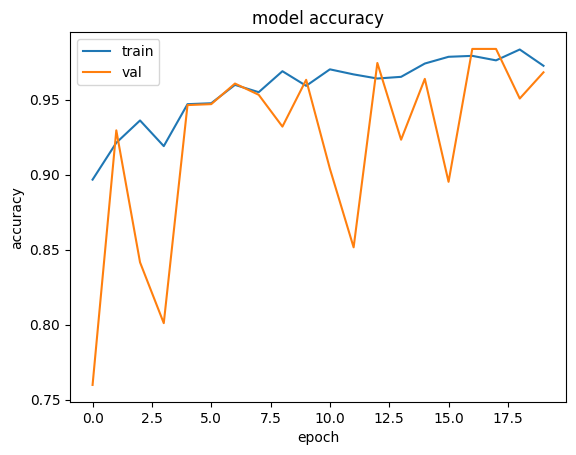

In [61]:
#plot of accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

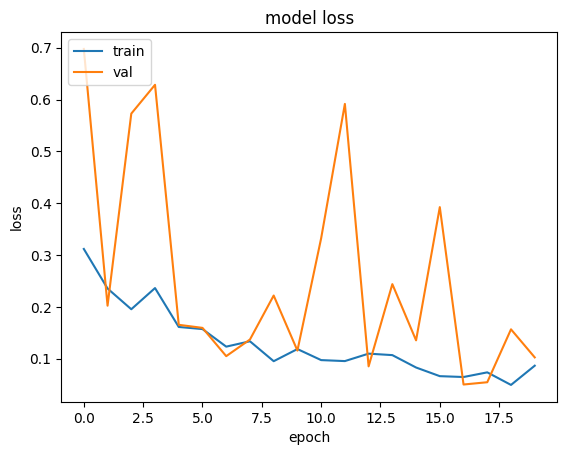

In [62]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.save('Skin Cancer.h5')


In [33]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 9ms/step - loss: 1.4313 - accuracy: 0.7349


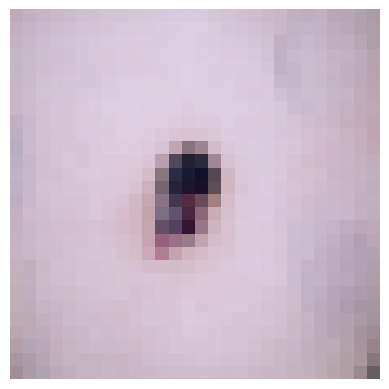

1/1 [==============================] - 0s 36ms/step
[4.28491433e-07 1.59407246e-05 1.12520496e-07 1.09778421e-05
 4.62990147e-06 9.99964952e-01 2.93720200e-06]
('vasc', ' pyogenic granulomas and hemorrhage')


In [36]:
# Import the necessary libraries
import PIL
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = PIL.Image.open('C:/Users/91891/Downloads/ISIC_0025578.jpg')
image = image.resize((28, 28))

# Convert the image to a NumPy array
img = np.array(image)

# Reshape the array if needed
#img = img.reshape(-1, 28, 28, 3)  # Uncomment this line if needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Rest of your code
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])
